<a href="https://colab.research.google.com/github/jaideep6214/Diabetes-Classification-using-Logistic-Regression/blob/main/diabetes_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# Step-1: Importing all Libraries

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot  as plt
import seaborn as sns

# Step-2: Loading Dataset

In [4]:
df=pd.read_csv("/content/gdrive/My Drive/ML Projects/Logistic Regression/diabetes.csv")

# Step-3:Exploring Dataset

In [5]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
df.shape  # We have 4600 rows and 9 Columns

(768, 9)

In [7]:
df.columns  #Column names

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [8]:
df.index  #Row names from 0 to 768

RangeIndex(start=0, stop=768, step=1)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


# Step-4:AIM-Predict if a patient has diabetes or not

### Dependent Variable = Outcome and Independent Variable are rest of the columns

In [10]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# STEP-5: Data Pre-Processing

## 1: Data Cleaning

### (a): Removing Unwanted Observation

In [11]:
df.isnull().any() # No null values

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [12]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [13]:
df.head() #Here all informartion is relevant

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### (b):Missing Data Handling

In [14]:
# There is no missing data

### (c): Outlier Management of each variable

In [15]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Pregnancies

In [16]:
df["Pregnancies"].unique()

array([ 6,  1,  8,  0,  5,  3, 10,  2,  4,  7,  9, 11, 13, 15, 17, 12, 14])

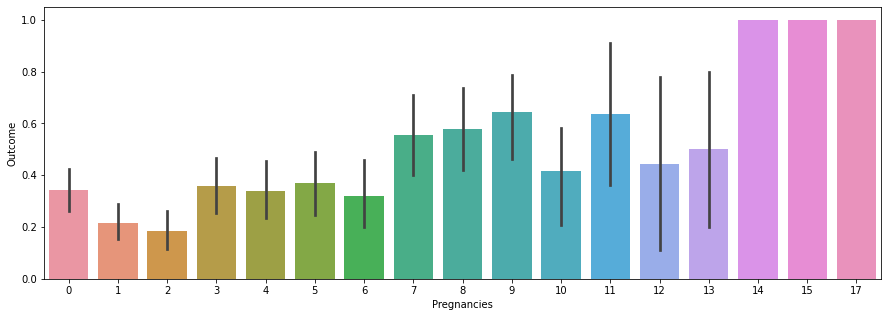

In [17]:
fig, ax = plt.subplots(figsize=(15,5))
sns.barplot(x = df.Pregnancies, y = df.Outcome)

### Glucose

In [18]:
df["Glucose"].describe()

count    768.000000
mean     120.894531
std       31.972618
min        0.000000
25%       99.000000
50%      117.000000
75%      140.250000
max      199.000000
Name: Glucose, dtype: float64

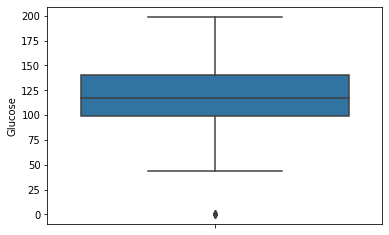

In [19]:
sns.boxplot(y=df["Glucose"])  #0 is the outlier
plt.show()

In [20]:
df = df[(df.Glucose > 0)].copy() # Removing 0 Glucose

In [21]:
df["Glucose"].describe()

count    763.000000
mean     121.686763
std       30.535641
min       44.000000
25%       99.000000
50%      117.000000
75%      141.000000
max      199.000000
Name: Glucose, dtype: float64

### BloodPressure

In [22]:
df["BloodPressure"].describe()

count    763.000000
mean      69.115334
std       19.399240
min        0.000000
25%       62.000000
50%       72.000000
75%       80.000000
max      122.000000
Name: BloodPressure, dtype: float64

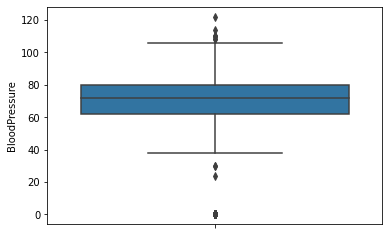

In [23]:
sns.boxplot(y=df["BloodPressure"])  #0 is the outlier
plt.show()

In [24]:
df = df[(df.BloodPressure > 0)].copy() # Removing 0 BloodPressure

In [25]:
df["BloodPressure"].describe()

count    728.000000
mean      72.438187
std       12.386109
min       24.000000
25%       64.000000
50%       72.000000
75%       80.000000
max      122.000000
Name: BloodPressure, dtype: float64

### SkinThickness

In [26]:
df["SkinThickness"].describe()

count    728.000000
mean      21.388736
std       15.729793
min        0.000000
25%        0.000000
50%       24.000000
75%       33.000000
max       99.000000
Name: SkinThickness, dtype: float64

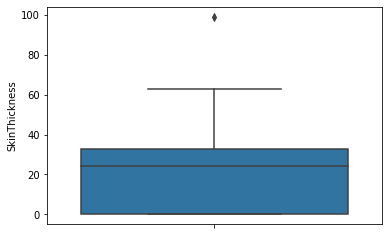

In [27]:
sns.boxplot(y=df["SkinThickness"])  #99 is the outlier
plt.show()

In [28]:
df = df[(df.SkinThickness < 99)].copy() # Removing 99 SkinThickness

In [29]:
df["SkinThickness"].describe()

count    727.000000
mean      21.281981
std       15.474461
min        0.000000
25%        0.000000
50%       24.000000
75%       33.000000
max       63.000000
Name: SkinThickness, dtype: float64

In [30]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


### Insulin

In [31]:
df["Insulin"].describe()

count    727.000000
mean      84.268226
std      116.858575
min        0.000000
25%        0.000000
50%       48.000000
75%      130.000000
max      846.000000
Name: Insulin, dtype: float64

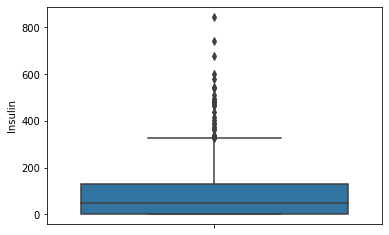

In [32]:
sns.boxplot(y=df["Insulin"]) 
plt.show()

### BMI

In [33]:
df["BMI"].describe()

count    727.000000
mean      32.285420
std        7.282119
min        0.000000
25%       27.400000
50%       32.300000
75%       36.600000
max       67.100000
Name: BMI, dtype: float64

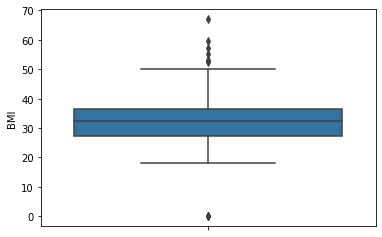

In [34]:
sns.boxplot(y=df["BMI"])  #0 is the outlier
plt.show()

In [35]:
df = df[(df.BMI > 0)].copy() # Removing 99 SkinThickness

In [36]:
df["BMI"].describe()

count    723.000000
mean      32.464039
std        6.893208
min       18.200000
25%       27.500000
50%       32.400000
75%       36.600000
max       67.100000
Name: BMI, dtype: float64

### DiabetesPedigreeFunction	

In [37]:
df["DiabetesPedigreeFunction"].describe()

count    723.000000
mean       0.474627
std        0.332524
min        0.078000
25%        0.245000
50%        0.378000
75%        0.628000
max        2.420000
Name: DiabetesPedigreeFunction, dtype: float64

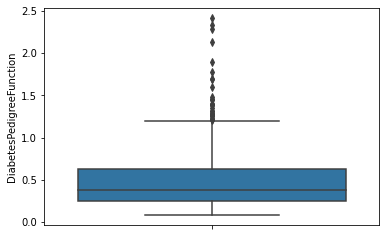

In [38]:
sns.boxplot(y=df["DiabetesPedigreeFunction"])  
plt.show()

### Age

In [39]:
df["Age"].describe()

count    723.000000
mean      33.311203
std       11.725093
min       21.000000
25%       24.000000
50%       29.000000
75%       41.000000
max       81.000000
Name: Age, dtype: float64

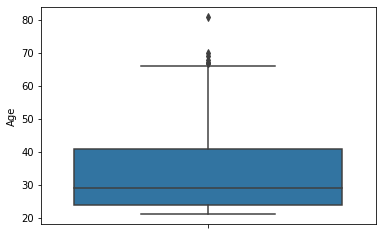

In [40]:
sns.boxplot(y=df["Age"])  #No outlier
plt.show()

## 2:Data Integration (We only have one data source)

## 3:Data Transformation

In [41]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [42]:
df["Pregnancies"]=(df["Pregnancies"]-df["Pregnancies"].min())/(df["Pregnancies"].max()-df["Pregnancies"].min())
df["Glucose"]=(df["Glucose"]-df["Glucose"].min())/(df["Glucose"].max()-df["Glucose"].min())
df["BloodPressure"]=(df["BloodPressure"]-df["BloodPressure"].min())/(df["BloodPressure"].max()-df["BloodPressure"].min())
df["SkinThickness"]=(df["SkinThickness"]-df["SkinThickness"].min())/(df["SkinThickness"].max()-df["SkinThickness"].min())
df["Insulin"]=(df["Insulin"]-df["Insulin"].min())/(df["Insulin"].max()-df["Insulin"].min())
df["BMI"]=(df["BMI"]-df["BMI"].min())/(df["BMI"].max()-df["BMI"].min())
df["DiabetesPedigreeFunction"]=(df["DiabetesPedigreeFunction"]-df["DiabetesPedigreeFunction"].min())/(df["DiabetesPedigreeFunction"].max()-df["DiabetesPedigreeFunction"].min())
df["Age"]=(df["Age"]-df["Age"].min())/(df["Age"].max()-df["Age"].min())

In [43]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.670968,0.489796,0.555556,0.000000,0.314928,0.234415,0.483333,1
1,0.058824,0.264516,0.428571,0.460317,0.000000,0.171779,0.116567,0.166667,0
2,0.470588,0.896774,0.408163,0.000000,0.000000,0.104294,0.253629,0.183333,1
3,0.058824,0.290323,0.428571,0.365079,0.111111,0.202454,0.038002,0.000000,0
4,0.000000,0.600000,0.163265,0.555556,0.198582,0.509202,0.943638,0.200000,1


## 4:Data Reduction

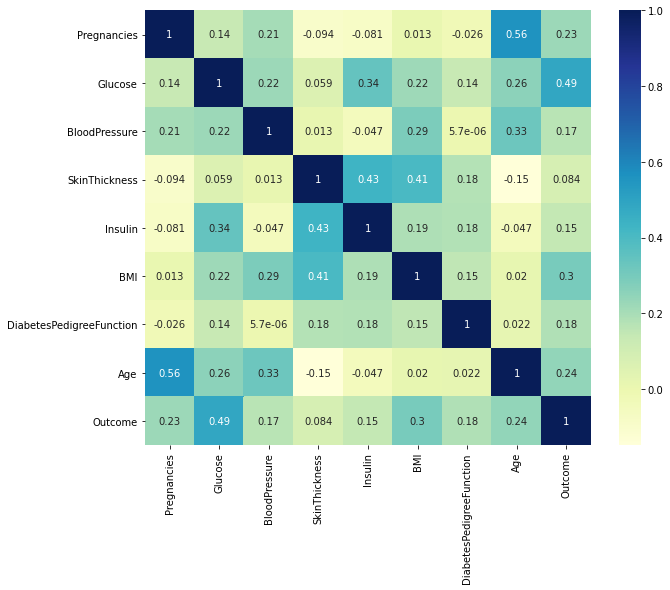

In [44]:
fig, ax = plt.subplots(figsize=(10, 8))  
cor = df.corr()
sns.heatmap(cor, annot = True, cmap="YlGnBu")

# Imp-Step: Correcting Data Index

In [45]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.670968,0.489796,0.555556,0.000000,0.314928,0.234415,0.483333,1
1,0.058824,0.264516,0.428571,0.460317,0.000000,0.171779,0.116567,0.166667,0
2,0.470588,0.896774,0.408163,0.000000,0.000000,0.104294,0.253629,0.183333,1
3,0.058824,0.290323,0.428571,0.365079,0.111111,0.202454,0.038002,0.000000,0
4,0.000000,0.600000,0.163265,0.555556,0.198582,0.509202,0.943638,0.200000,1
...,...,...,...,...,...,...,...,...,...
763,0.588235,0.367742,0.530612,0.761905,0.212766,0.300613,0.039710,0.700000,0
764,0.117647,0.503226,0.469388,0.428571,0.000000,0.380368,0.111870,0.100000,0
765,0.294118,0.496774,0.489796,0.365079,0.132388,0.163599,0.071307,0.150000,0
766,0.058824,0.529032,0.367347,0.000000,0.000000,0.243354,0.115713,0.433333,1


In [46]:
df = df.reset_index()

In [47]:
df

,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,0.352941,0.670968,0.489796,0.555556,0.000000,0.314928,0.234415,0.483333,1
1,1,0.058824,0.264516,0.428571,0.460317,0.000000,0.171779,0.116567,0.166667,0
2,2,0.470588,0.896774,0.408163,0.000000,0.000000,0.104294,0.253629,0.183333,1
3,3,0.058824,0.290323,0.428571,0.365079,0.111111,0.202454,0.038002,0.000000,0
4,4,0.000000,0.600000,0.163265,0.555556,0.198582,0.509202,0.943638,0.200000,1
...,...,...,...,...,...,...,...,...,...,...
718,763,0.588235,0.367742,0.530612,0.761905,0.212766,0.300613,0.039710,0.700000,0
719,764,0.117647,0.503226,0.469388,0.428571,0.000000,0.380368,0.111870,0.100000,0
720,765,0.294118,0.496774,0.489796,0.365079,0.132388,0.163599,0.071307,0.150000,0
721,766,0.058824,0.529032,0.367347,0.000000,0.000000,0.243354,0.115713,0.433333,1


In [48]:
df.drop(['index'], axis = 1, inplace = True)

In [49]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.670968,0.489796,0.555556,0.000000,0.314928,0.234415,0.483333,1
1,0.058824,0.264516,0.428571,0.460317,0.000000,0.171779,0.116567,0.166667,0
2,0.470588,0.896774,0.408163,0.000000,0.000000,0.104294,0.253629,0.183333,1
3,0.058824,0.290323,0.428571,0.365079,0.111111,0.202454,0.038002,0.000000,0
4,0.000000,0.600000,0.163265,0.555556,0.198582,0.509202,0.943638,0.200000,1


## 5:Data Discretization

In [50]:
#No need

# Step-6:Training Machine Learning Model

In [51]:
y = df["Outcome"]

In [52]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [53]:
X=df.iloc[:, :8]

In [54]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.352941,0.670968,0.489796,0.555556,0.000000,0.314928,0.234415,0.483333
1,0.058824,0.264516,0.428571,0.460317,0.000000,0.171779,0.116567,0.166667
2,0.470588,0.896774,0.408163,0.000000,0.000000,0.104294,0.253629,0.183333
3,0.058824,0.290323,0.428571,0.365079,0.111111,0.202454,0.038002,0.000000
4,0.000000,0.600000,0.163265,0.555556,0.198582,0.509202,0.943638,0.200000


In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=42)

In [56]:
print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))

686
686
37
37


## Logistic Regression

In [57]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()

## Training Logistic Regression Model

In [58]:
log_reg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## Accuracy of Model

In [59]:
accuracy = log_reg.score(X_test,y_test)
print(accuracy*100,'%')

72.97297297297297 %


## Model is ready now lets test it!

In [60]:
info=X_test.iloc[0,:]
print(info)

Pregnancies                 0.058824
Glucose                     0.980645
BloodPressure               0.530612
SkinThickness               0.571429
Insulin                     0.294326
BMI                         0.374233
DiabetesPedigreeFunction    0.340307
Age                         0.133333
Name: 336, dtype: float64


In [61]:
ans=y_test.iloc[0]
print(ans)

1


In [62]:
log_reg.predict([info])

array([1])